In [24]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from statsmodels.api import OLS
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df_housing = pd.read_excel("hackathon/Housing.xlsx", usecols=["Area", "Property: Owner-occupied"], index_col="Area")
df_income = pd.read_excel("hackathon/Income.xlsx", usecols=["Area", "Mean disposable household income"], index_col="Area")
df_population = pd.read_excel("hackathon/Population.xlsx", usecols=["Area", "Population density"], index_col="Area")
df_solar = pd.read_excel("hackathon/Solar panels.xlsx", usecols=["Area", "Year", "nl_wp_Wonen"], index_col="Area")

In [3]:
df_solar = df_solar.loc[df_solar["Year"] == 2021]
df_solar = df_solar.drop(columns=["Year"])

In [4]:
df = pd.concat([df_housing, df_income, df_population, df_solar], axis=1)
df = df.dropna()
df = df.replace('-', 0)
df.sort_values(by=['Property: Owner-occupied'])

C:\Users\marni\AppData\Local\Temp\ipykernel_21876\2388291356.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace('-', 0)


,Property: Owner-occupied,Mean disposable household income,Population density,nl_wp_Wonen
Area,,,,
Sloterdijk Nieuw-West,5,25000,121,129510.0
Coenhaven/Minervahaven,5,0,0,0.0
Amstel III/Bullewijk,6,29600,334,398248.0
Sloterdijk-West,18,53000,427,31068.0
Noordelijke IJ-oevers-Oost,24,32200,363,99668.0
...,...,...,...,...
Middenmeer,2925,63300,5661,1441733.0
De Aker,2946,54900,9645,2643576.0
Sloten/Nieuw-Sloten,3029,55700,3086,3343607.0


In [5]:
df.astype({'Mean disposable household income': 'int64', 'Population density': 'int64'}).dtypes
df.dtypes

Property: Owner-occupied              int64
Mean disposable household income      int64
Population density                    int64
nl_wp_Wonen                         float64
dtype: object

In [6]:
train_df, test_df = train_test_split(df, test_size=0.2)

In [9]:
# creating a regression model with sklearn
x_train_hos = train_df[['Property: Owner-occupied']].copy()
x_train_income = train_df[['Mean disposable household income']].copy()
x_train_density = train_df[['Population density']].copy()
x_test_hos = test_df[['Property: Owner-occupied']].copy()
x_test_income = test_df[['Mean disposable household income']].copy()
x_test_density = test_df[['Population density']].copy()

y_train = train_df['nl_wp_Wonen'].copy()
y_test = test_df['nl_wp_Wonen'].copy()

model_hos = LinearRegression().fit(x_train_hos,y_train)
model_income = LinearRegression().fit(x_train_income,y_train)
model_density = LinearRegression().fit(x_train_density,y_train)

In [20]:
#scoring the models
print(f"The r2 score for home ownership univariate model ={model_hos.score(x_test_hos, y_test)}")
print(f"The r2 score for income univariate model ={model_income.score(x_test_income, y_test)}")
print(f"The r2 score for population density univariate model ={model_density.score(x_test_density, y_test)}")

The r2 score for home ownership univariate model =0.16605454741410075
The r2 score for income univariate model =-0.19072238330610025
The r2 score for population density univariate model =-0.02100719045259658


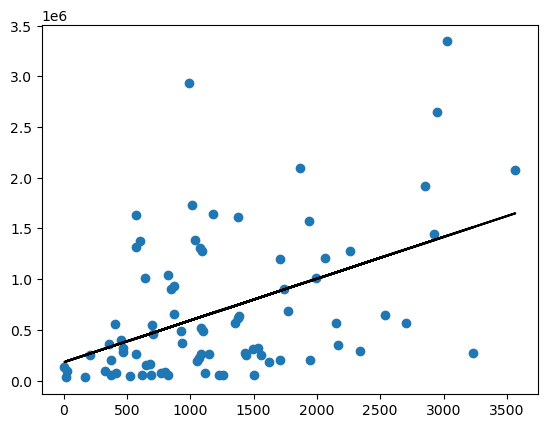

In [49]:
prediction = model_hos.predict(x_train_hos)
plt.plot(x_train_hos['Property: Owner-occupied'],prediction, color='k', label="Prediction")
plt.scatter(x_train_hos, y_train, label="Test Data")

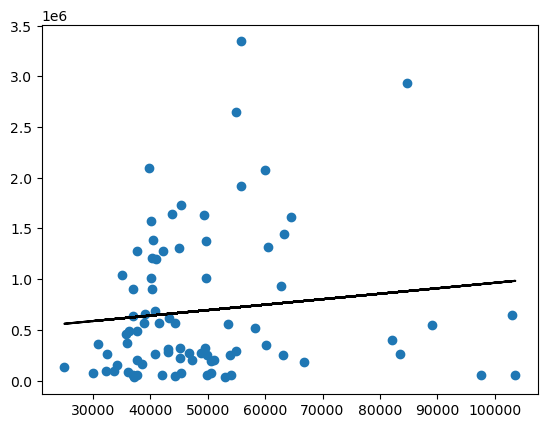

In [48]:
prediction = model_income.predict(x_train_income)
plt.plot(x_train_income['Mean disposable household income'],prediction, color='k', label="Prediction")
plt.scatter(x_train_income, y_train, label="Test Data")

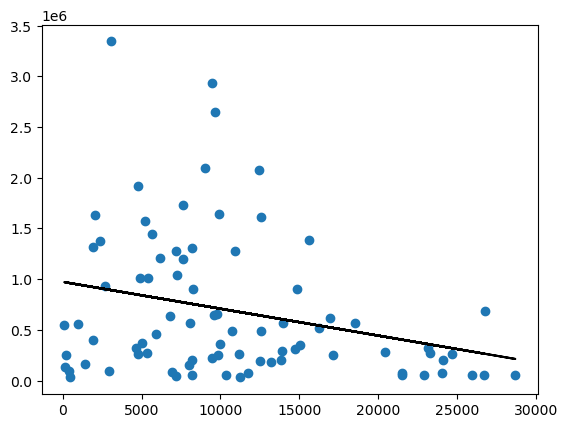

In [51]:
prediction = model_density.predict(x_train_density)
plt.plot(x_train_density['Population density'],prediction, color='k', label="Prediction")
plt.scatter(x_train_density, y_train, label="Test Data")
plt.title()